## Data Loading & Initial Inspection

In [8]:
import pandas as pd
df=pd.read_csv('tab-history-2025-10-30.csv')
df.head()
df

,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,"10/26/2025, 10:10:40","10/26/2025, 10:08:48",https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,"10/26/2025, 11:21:34","10/26/2025, 11:21:08",https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,"10/26/2025, 11:40:47","10/26/2025, 11:22:37",https://in.search.yahoo.com/favicon.ico,NaN,NaN
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,"10/26/2025, 11:41:15","10/26/2025, 11:24:56",https://in.search.yahoo.com/favicon.ico,NaN,NaN
4,(32) YouTube,https://www.youtube.com/,Closed,"10/27/2025, 13:41:59","10/26/2025, 11:20:38",https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
...,...,...,...,...,...,...,...,...
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,"10/30/2025, 11:39:20","10/27/2025, 11:38:11",https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,"10/30/2025, 11:39:29","10/29/2025, 15:43:47",https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
144,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,"10/30/2025, 13:25:09","10/30/2025, 11:39:44",https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
145,New Tab,NaN,Closed,"10/30/2025, 14:51:28","10/26/2025, 11:39:31",NaN,NaN,NaN


In [9]:
print(df.columns)

Index(['Title', 'URL', 'Status', 'Last Activity', 'First Opened', 'Favicon',
       'Window ID', 'Tab ID'],
      dtype='object')


Loads your tab data into a DataFrame and shows the first few rows to confirm it loaded correctly.

##  Clean and Prepare Data

In [10]:
# Convert time columns to datetime format
df['Last Activity'] = pd.to_datetime(df['Last Activity'], errors='coerce')
df['First Opened'] = pd.to_datetime(df['First Opened'], errors='coerce')

In [11]:
df['Last Activity']

0     2025-10-26 10:10:40
1     2025-10-26 11:21:34
2     2025-10-26 11:40:47
3     2025-10-26 11:41:15
4     2025-10-27 13:41:59
              ...        
142   2025-10-30 11:39:20
143   2025-10-30 11:39:29
144   2025-10-30 13:25:09
145   2025-10-30 14:51:28
146   2025-10-30 14:51:28
Name: Last Activity, Length: 147, dtype: datetime64[ns]

In [13]:
# Remove empty/chrome-internal URLs
df=df[df['URL'].notnull() & (df['URL'] !='')].copy()
df

,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
...,...,...,...,...,...,...,...,...
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
144,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 13:25:09,2025-10-30 11:39:44,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN


In [14]:
df=df[~df['URL'].str.startswith('chrome://',na=False)].copy()
df

,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN
...,...,...,...,...,...,...,...,...
140,Pandas Task - 4.docx - Google Docs,https://docs.google.com/document/d/1VAsRu8ufqm...,Closed,2025-10-30 00:07:34,2025-10-29 21:47:57,https://ssl.gstatic.com/docs/documents/images/...,NaN,NaN
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN


Ensures your time columns can be used for calculations and filters out non-web pages.

##  Extract Domain and Categorize Websites

In [16]:
# Extract domain name from each URL
df['Domain'] = df['URL'].str.extract(r'https?://(?:www\.)?([^/?#]+)')
df


,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID,Domain
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN,chromewebstore.google.com
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com
...,...,...,...,...,...,...,...,...,...
140,Pandas Task - 4.docx - Google Docs,https://docs.google.com/document/d/1VAsRu8ufqm...,Closed,2025-10-30 00:07:34,2025-10-29 21:47:57,https://ssl.gstatic.com/docs/documents/images/...,NaN,NaN,docs.google.com
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN,chatgpt.com
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in


In [17]:
df['Domain'].value_counts()

Domain
docs.google.com              26
notion.so                    21
online.innomatics.in         19
accounts.google.com          11
in.search.yahoo.com           9
linkedin.com                  9
drive.google.com              8
youtube.com                   8
chatgpt.com                   6
resumeworded.com              6
kaggle.com                    4
instahyre.com                 4
mail.google.com               3
profile.indeed.com            3
in.indeed.com                 2
notion.com                    1
jobleads.com                  1
whatsapp.com                  1
web.whatsapp.com              1
chromewebstore.google.com     1
Name: count, dtype: int64

In [18]:

print(df[['URL', 'Domain']].head())

                                                 URL  \
0  https://chromewebstore.google.com/detail/tab-l...   
1        https://www.youtube.com/watch?v=w_PdwhiVS-Y   
2  https://in.search.yahoo.com/search?fr=mcafee&t...   
3  https://in.search.yahoo.com/search?fr=mcafee&t...   
4                           https://www.youtube.com/   

                      Domain  
0  chromewebstore.google.com  
1                youtube.com  
2        in.search.yahoo.com  
3        in.search.yahoo.com  
4                youtube.com  


In [19]:
category_map = {
    # Productivity / Notes
    'notion.so': 'Productivity',
    'notion.com': 'Productivity',

    # Work / Google Services
    'accounts.google.com': 'Work',
    'mail.google.com': 'Work',
    'docs.google.com': 'Work',
    'chromewebstore.google.com': 'Work',
    'google.com': 'Work',
    'drive.google.com': 'Work',
    'calendar.google.com': 'Work',

    # Professional / Jobs / Career
    'linkedin.com': 'Professional',
    'instahyre.com': 'Jobs',
    'in.indeed.com': 'Jobs',
    'profile.indeed.com': 'Jobs',
    'jobleads.com': 'Jobs',
    'resumeworded.com': 'Jobs',
    'wellfound.com': 'Jobs',
    'glassdoor.com': 'Jobs',
    'naukri.com': 'Jobs',

    # Learning / Data / Tech
    'kaggle.com': 'Learning/Data',
    'online.innomatics.in': 'Learning/Data',
    'stackoverflow.com': 'Learning/Data',
    'coursera.org': 'Learning',
    'udemy.com': 'Learning',
    'edx.org': 'Learning',
    'khanacademy.org': 'Learning',

    # Search / Information
    'in.search.yahoo.com': 'Search',
    'bing.com': 'Search',
    'duckduckgo.com': 'Search',
    'yahoo.com': 'Search',

    # Social / Chat
    'whatsapp.com': 'Social',
    'web.whatsapp.com': 'Social',
    'facebook.com': 'Social',
    'twitter.com': 'Social',
    'instagram.com': 'Social',
    'snapchat.com': 'Social',
    'reddit.com': 'Social',

    # Video / Entertainment / Streaming
    'youtube.com': 'Entertainment',
    'netflix.com': 'Entertainment',
    'primevideo.com': 'Entertainment',
    'hotstar.com': 'Entertainment',
    'spotify.com': 'Entertainment',

    # Shopping / Ecommerce
    'amazon.com': 'Shopping',
    'flipkart.com': 'Shopping',
    'myntra.com': 'Shopping',
    'ebay.com': 'Shopping',
    'olx.in': 'Shopping',

    # AI Tools / Tech
    'chatgpt.com': 'AI/Tools',

    # News / Information
    'bbc.com': 'News',
    'cnn.com': 'News',
    'nytimes.com': 'News',
    'theguardian.com': 'News',
    'indiatimes.com': 'News',

    # Banking / Finance / Payments
    'icicibank.com': 'Finance',
    'hdfcbank.com': 'Finance',
    'axisbank.com': 'Finance',
    'paytm.com': 'Finance',

    # Government / Utilities
    'sarathi.parivahan.gov.in': 'Government',
    'irctc.co.in': 'Government',
    'uidai.gov.in': 'Government',
    'incometax.gov.in': 'Government',
}




In [21]:
df['Category'] = df['Domain'].map(category_map).fillna('Other')
df

,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID,Domain,Category
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN,chromewebstore.google.com,Work
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment
...,...,...,...,...,...,...,...,...,...,...
140,Pandas Task - 4.docx - Google Docs,https://docs.google.com/document/d/1VAsRu8ufqm...,Closed,2025-10-30 00:07:34,2025-10-29 21:47:57,https://ssl.gstatic.com/docs/documents/images/...,NaN,NaN,docs.google.com,Work
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN,chatgpt.com,AI/Tools
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data


Gets the main website name for grouping (e.g., youtube.com) and assigns a broad category.

## Calculate Tab Usage Duration

In [22]:
# Step 1: Create Duration_seconds
df['Duration_seconds'] = (df['Last Activity'] - df['First Opened']).dt.total_seconds()

# Step 2: Define the conversion function
import numpy as np
def seconds_to_hms(seconds):
    if pd.isnull(seconds):
        return None
    seconds = int(seconds)
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    secs = seconds % 60
    return f"{hours:02}:{minutes:02}:{secs:02}"

# Step 3: Apply and view result
df['Duration_HMS'] = df['Duration_seconds'].apply(seconds_to_hms)
print(df[['Duration_seconds', 'Duration_HMS']].head())
df

   Duration_seconds Duration_HMS
0             112.0     00:01:52
1              26.0     00:00:26
2            1090.0     00:18:10
3             979.0     00:16:19
4           94881.0     26:21:21


,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID,Domain,Category,Duration_seconds,Duration_HMS
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN,chromewebstore.google.com,Work,112.0,00:01:52
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment,26.0,00:00:26
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search,1090.0,00:18:10
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search,979.0,00:16:19
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment,94881.0,26:21:21
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Pandas Task - 4.docx - Google Docs,https://docs.google.com/document/d/1VAsRu8ufqm...,Closed,2025-10-30 00:07:34,2025-10-29 21:47:57,https://ssl.gstatic.com/docs/documents/images/...,NaN,NaN,docs.google.com,Work,8377.0,02:19:37
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN,chatgpt.com,AI/Tools,2606.0,00:43:26
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data,259269.0,72:01:09
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data,71742.0,19:55:42


In [23]:
df_closed = df[df['Status'] == 'Closed']
df_closed

,Title,URL,Status,Last Activity,First Opened,Favicon,Window ID,Tab ID,Domain,Category,Duration_seconds,Duration_HMS
0,Tab Logger - Simplify History - Chrome Web Store,https://chromewebstore.google.com/detail/tab-l...,Closed,2025-10-26 10:10:40,2025-10-26 10:08:48,https://ssl.gstatic.com/chrome/webstore/images...,NaN,NaN,chromewebstore.google.com,Work,112.0,00:01:52
1,(22) Grandmaster Lobby Live Rank Push Free Fir...,https://www.youtube.com/watch?v=w_PdwhiVS-Y,Closed,2025-10-26 11:21:34,2025-10-26 11:21:08,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment,26.0,00:00:26
2,perplxity - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:40:47,2025-10-26 11:22:37,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search,1090.0,00:18:10
3,facebook - Yahoo India Search Results,https://in.search.yahoo.com/search?fr=mcafee&t...,Closed,2025-10-26 11:41:15,2025-10-26 11:24:56,https://in.search.yahoo.com/favicon.ico,NaN,NaN,in.search.yahoo.com,Search,979.0,00:16:19
4,(32) YouTube,https://www.youtube.com/,Closed,2025-10-27 13:41:59,2025-10-26 11:20:38,https://www.youtube.com/s/desktop/ab67e92c/img...,NaN,NaN,youtube.com,Entertainment,94881.0,26:21:21
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Pandas Task - 4.docx - Google Docs,https://docs.google.com/document/d/1VAsRu8ufqm...,Closed,2025-10-30 00:07:34,2025-10-29 21:47:57,https://ssl.gstatic.com/docs/documents/images/...,NaN,NaN,docs.google.com,Work,8377.0,02:19:37
141,Dataset options,https://chatgpt.com/c/690254ac-4728-8321-89d2-...,Closed,2025-10-30 00:07:34,2025-10-29 23:24:08,https://cdn.oaistatic.com/assets/favicon-l4nq0...,NaN,NaN,chatgpt.com,AI/Tools,2606.0,00:43:26
142,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:20,2025-10-27 11:38:11,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data,259269.0,72:01:09
143,Innomatics Research Labs,https://online.innomatics.in/myaccount/#/cours...,Closed,2025-10-30 11:39:29,2025-10-29 15:43:47,https://dme2wmiz2suov.cloudfront.net/Instituti...,NaN,NaN,online.innomatics.in,Learning/Data,71742.0,19:55:42


Finds out how long each tab was kept open (makes most sense for closed tabs).

##  Analyze Key Metrics

In [24]:
# Step 1: Assign Category to whole DataFrame
df['Category'] = df['Domain'].map(category_map).fillna('Other')

# Step 2: Filter closed tabs (keep the new column)
df_closed = df[df['Status'] == 'Closed'].copy()

# Step 3: Now you can run your category analysis:
category_counts = df_closed['Category'].value_counts()
category_counts


Category
Work             49
Learning/Data    23
Productivity     22
Jobs             16
Search            9
Professional      9
Entertainment     8
AI/Tools          6
Social            2
Name: count, dtype: int64

In [27]:
# Top 5 sites by time spent (closed tabs)
domain_time = df_closed.groupby('Domain')['Duration_seconds'].sum().sort_values(ascending=False)
print(domain_time.head())

Domain
online.innomatics.in    1059385.0
chatgpt.com              324365.0
linkedin.com             192824.0
youtube.com              188859.0
web.whatsapp.com         178848.0
Name: Duration_seconds, dtype: float64


Reveals your browsing habits by site category and major focus/distraction points.

## Visualize Your Patterns

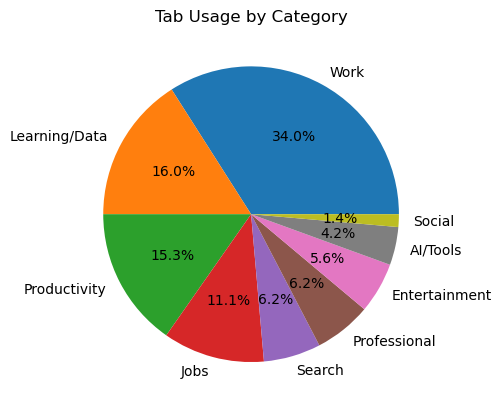

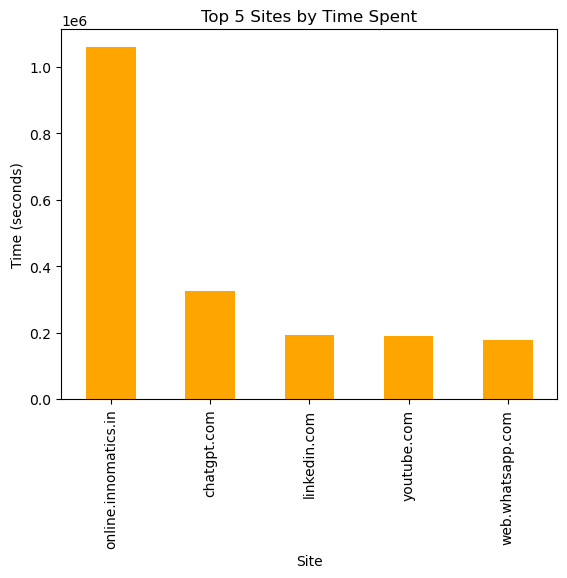

In [28]:
import matplotlib.pyplot as plt

# Pie chart for categories
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tab Usage by Category')
plt.ylabel('')
plt.show()

# Bar chart for most time spent per domain
domain_time.head(5).plot(kind='bar', color='orange')
plt.title('Top 5 Sites by Time Spent')
plt.xlabel('Site')
plt.ylabel('Time (seconds)')
plt.show()


Makes your analysis easy to understand at a glance.

# Productivity Insights

In [29]:
top_category = category_counts.idxmax()
top_site = domain_time.idxmax()

print(f'Most of your time was spent on: {top_category} sites.')
print(f'The single site you spent the most time on: {top_site}')


Most of your time was spent on: Work sites.
The single site you spent the most time on: online.innomatics.in


Summarizes your main productivity and distraction drivers.